In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

"department" - çalışanın ait olduğu departman.

"promoted" - çalışan önceki 24 ay içinde terfi etmişse 1, aksi takdirde 0.

"review" - çalışanın son değerlendirmesinde aldığı bileşik puan; 0 ila 1.

"projects" - çalışanın kaç projede yer aldığı.

"salary" - gizlilik nedeniyle maaş kademelendirilmiştir: düşük, orta, yüksek.

"tenure" - çalışanın şirkette kaç yıldır çalıştığı.

"satisfaction" - anketlere dayalı olarak çalışan memnuniyeti seviyesi; 0 ila 1.

"bonus" - çalışan bonus almışsa 1, aksi takdirde 0.

"avg_hrs_month" - çalışanın bir ay içinde çalıştığı ortalama saat.

"left" - çalışan işten ayrılmışsa "yes", aksi takdirde "no".

target feature is "left"

In [2]:
df = pd.read_csv("employee_churn_data.csv")
df.sample(5)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
2124,engineering,0,0.547420,2,medium,5.0,0.826785,0,181.067405,no
8966,sales,0,0.761825,3,medium,8.0,0.382051,0,189.866551,yes
2629,IT,0,0.500108,3,high,6.0,0.682406,0,182.902116,no
6131,engineering,1,0.775395,4,medium,7.0,0.333136,0,185.660017,no
8621,operations,0,0.669891,3,medium,8.0,0.540536,0,187.937071,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [4]:
df["left"].value_counts(normalize = True) * 100

no     70.81761
yes    29.18239
Name: left, dtype: float64

# key insight - 1
Personelin neredeyse %30'u son 24 ay içerisinde değişti

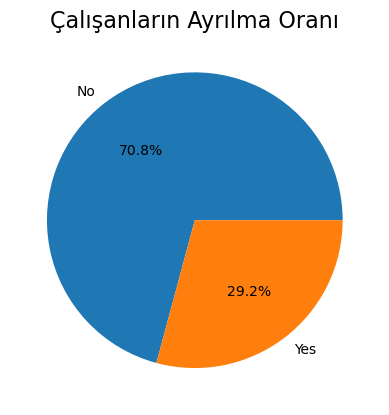

In [5]:
plt.pie(x = df["left"].value_counts(), labels = ["No", "Yes"], autopct = "%0.1f%%")
plt.title("Çalışanların Ayrılma Oranı", fontsize = 16);

# Key insight 2

Ayrılan personelin çoğu 5 yıldır şirkette çalışmaktadır ve yeniden eğitilmeleri zaman alan çok değerli becerileri temsil etmektedir

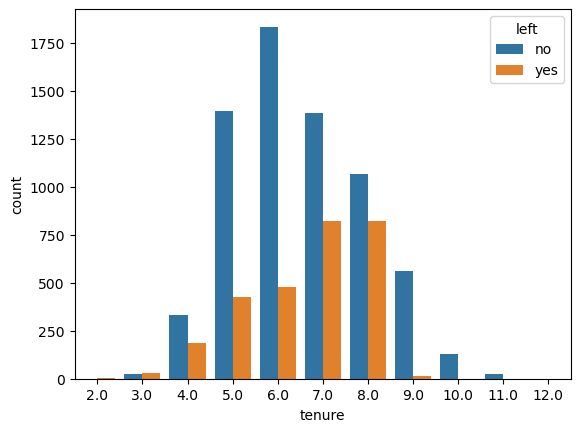

In [6]:
sns.countplot(data = df, x = df["tenure"], hue = df["left"]);
# plt.legend(loc = 2); # yes ve no yazan kutucuğun yerini ayarladık

In [7]:
def left_by_tenure(df, low, high):
    df_in = df[(df["tenure"] <= high) & (df["tenure"] >= low)]["left"].value_counts()
    df_out =df[~((df["tenure"] <= high) & (df["tenure"] >= low))]["left"].value_counts()
    return (df_in / (df_in + df_out))["yes"]

In [8]:
left_by_tenure(df, 5, 8)

0.9166666666666666

In [9]:
df_tenure = df.groupby(["tenure", "left"]).size().reset_index().pivot(columns = "tenure", index = "left", values = 0)
df_tenure
#

tenure,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
left,,,,,,,,,,,
no,1.0,27.0,332.0,1395.0,1835.0,1386.0,1065.0,564.0,127.0,23.0,1.0
yes,2.0,30.0,186.0,428.0,478.0,823.0,823.0,14.0,NaN,NaN,NaN


In [10]:
df.groupby(["tenure", "left"]).left.agg("count").unstack().T
# unstack ile series'i dataframe yaptık

tenure,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
left,,,,,,,,,,,
no,1.0,27.0,332.0,1395.0,1835.0,1386.0,1065.0,564.0,127.0,23.0,1.0
yes,2.0,30.0,186.0,428.0,478.0,823.0,823.0,14.0,NaN,NaN,NaN


In [11]:
df_in = df[(df["tenure"] <= 8) & (df["tenure"] >= 5)]["left"].value_counts()
df_in

no     5681
yes    2552
Name: left, dtype: int64

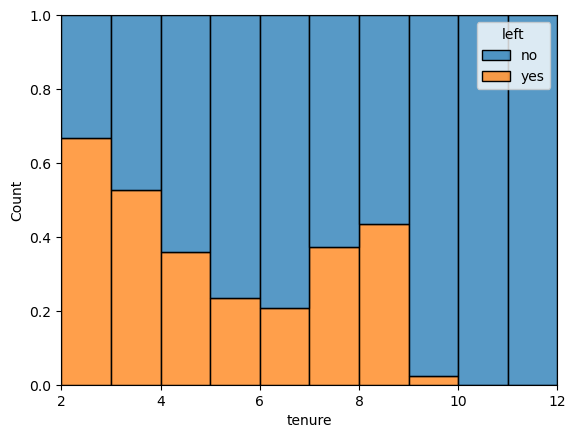

In [12]:
sns.histplot(x = df.tenure, hue = df.left, binwidth = 1, multiple = "fill");

In [13]:
df.department.value_counts()

sales          1883
retail         1541
operations     1522
engineering    1516
marketing       802
support         735
admin           423
finance         402
logistics       360
IT              356
Name: department, dtype: int64

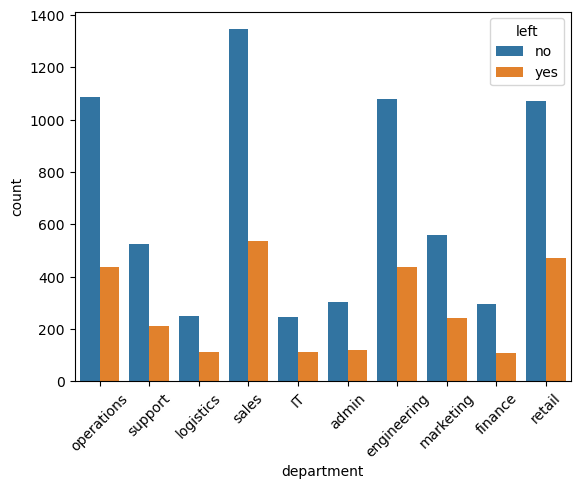

In [14]:
sns.countplot(data = df, x = df.department, hue = df.left)
plt.xticks(rotation = 45);

# Key insight 3

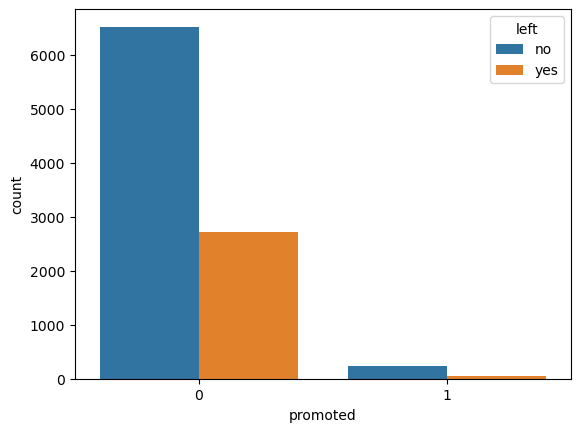

In [15]:
sns.countplot(data = df, x = df.promoted, hue = df.left);

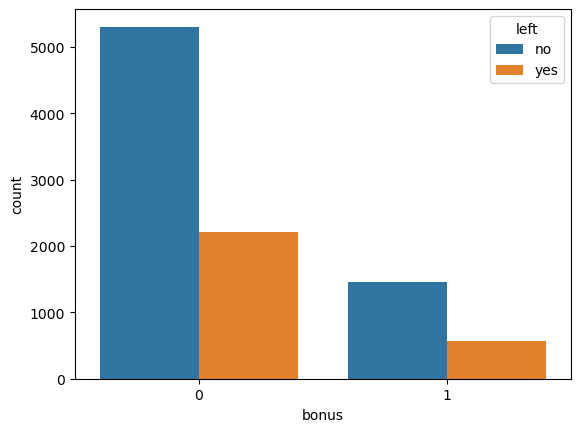

In [16]:
sns.countplot(data = df, x = df.bonus, hue = df.left);

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [23]:
df[df["avg_hrs_month"] > 185].count()

department       4521
promoted         4521
review           4521
projects         4521
salary           4521
tenure           4521
satisfaction     4521
bonus            4521
avg_hrs_month    4521
left             4521
dtype: int64

In [24]:
df[df["avg_hrs_month"] <= 185].count()

department       5019
promoted         5019
review           5019
projects         5019
salary           5019
tenure           5019
satisfaction     5019
bonus            5019
avg_hrs_month    5019
left             5019
dtype: int64

In [40]:
df[df["avg_hrs_month"] < 185]["left"].value_counts(normalize = True)

no     0.765093
yes    0.234907
Name: left, dtype: float64

In [41]:
df.left.value_counts(normalize = True)

no     0.708176
yes    0.291824
Name: left, dtype: float64

In [46]:
df.select_dtypes(include = object).describe().T

,count,unique,top,freq
department,9540,10,sales,1883
salary,9540,3,medium,6611
left,9540,2,no,6756


In [47]:
df.left.value_counts()

no     6756
yes    2784
Name: left, dtype: int64

In [53]:
df[df["left"] == "yes"]["left"] = 1

C:\Users\ertek\AppData\Local\Temp\ipykernel_18412\873693257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["left"] == "yes"]["left"] = 1
